Pregunta 1: An´alisis Exploratorio de Datos (EDA)

In [ ]:
import pandas as pd'https://raw.githubusercontent.com/javierherrera199
url = 6/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv'
df = pd.read_csv(url)
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Pregunta 2: Preprocesamiento de Datos


(4269, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None

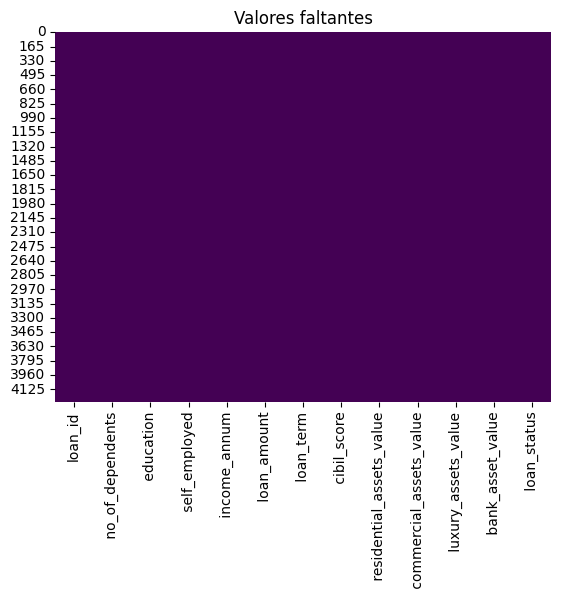

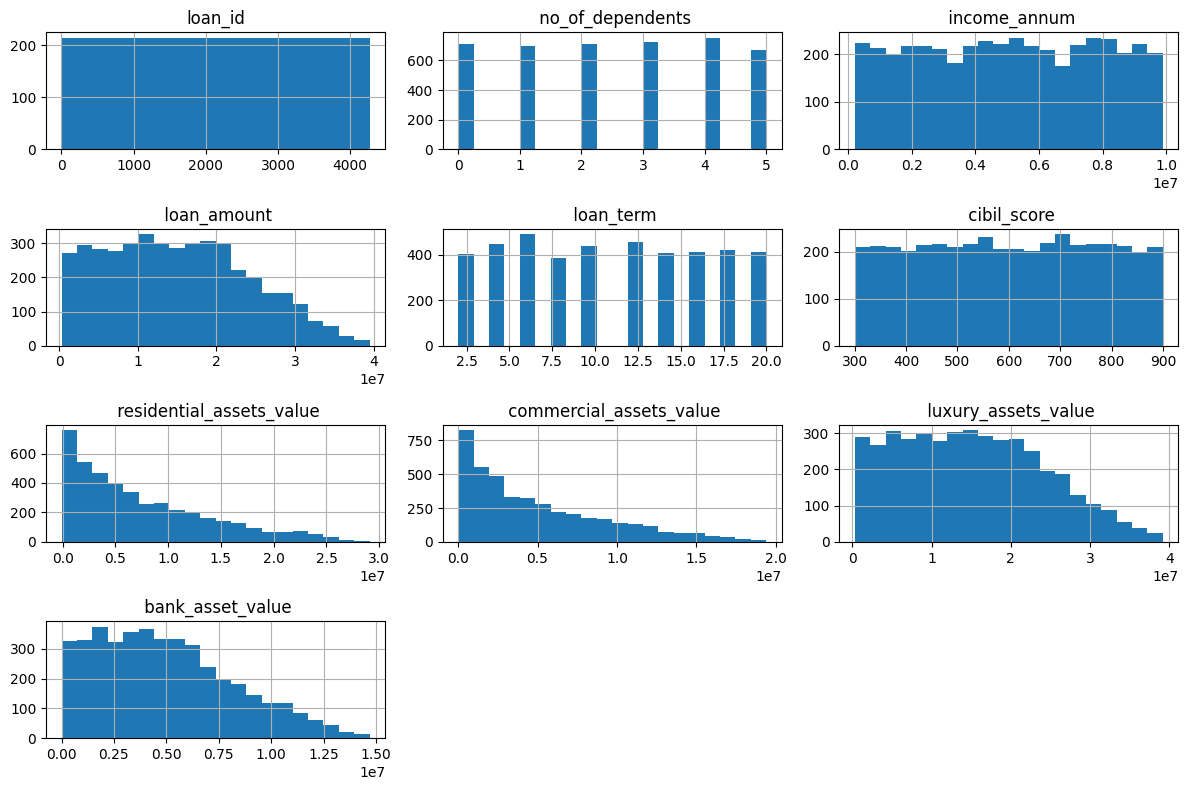

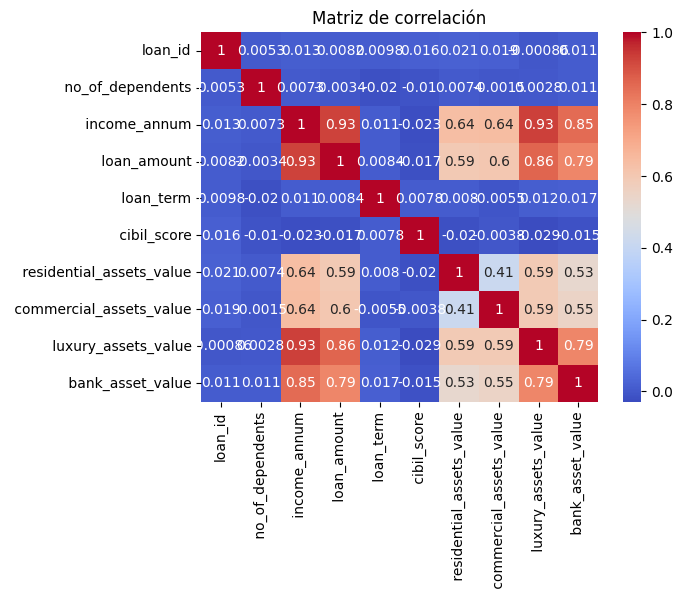

In [ ]:

print(df.shape)
print(df.info())


print(df.describe(include='all'))


import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Valores faltantes")
plt.show()

df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


2.2 Preprocesamiento de datos (valores nulos y outliers)

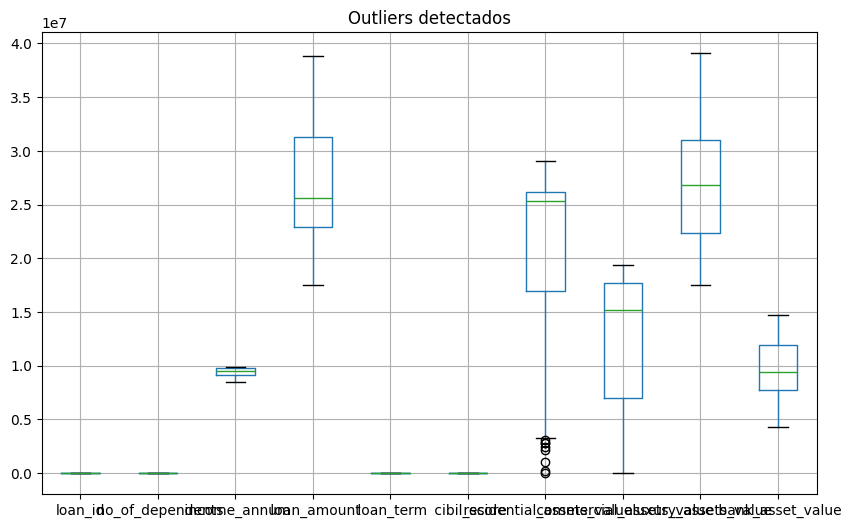

In [ ]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
numeric_df = df.select_dtypes(include='number')
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))
df[outliers.any(axis=1)].boxplot(figsize=(10,6))
plt.title("Outliers detectados")
plt.show()

Coloque estos pasos ya que son necesarios para evitar que los modelos aprendan patrones erróneos o estén sesgados por datos incompletos.

2.3 Pregunta 3: Modelos de Clasificación

In [ ]:

if 'Loan_Status' in df.columns:
    target_column = 'Loan_Status'
elif 'loan_status' in df.columns:
    target_column = 'loan_status'

elif 'loan_id' in df.columns:
    target_column = 'loan_id'
else:
    raise KeyError("Target column not found! Check your DataFrame for potential names.")

X = df.drop(target_column, axis=1)
y = df[target_column]

2.4 Desbalanceo de Clases: SMOTE

In [ ]:
!pip install scikit-learn pandas
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split


# Assuming X and y are defined from the previous step
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # Split data into training and testing sets

encoder = LabelEncoder()

for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column] = encoder.fit_transform(X_train[column])
    X_test[column] = encoder.transform(X_test[column])

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Ocurre cuando una clase (por ejemplo, "aprobado") está mucho más representada que la otra ("rechazado").

El modelo tiende a predecir siempre la clase mayoritaria, lo que reduce la capacidad de generalización.

2.5 Pregunta 5: Overfitting

In [ ]:
!pip install scikit-learn pandas
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # Split data into training and testing sets

encoder = LabelEncoder()

for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column] = encoder.fit_transform(X_train[column])
    X_test[column] = encoder.transform(X_test[column])

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

El modelo se ajusta demasiado a los datos de entrenamiento, incluyendo el ruido.

Tiene alto rendimiento en entrenamiento pero bajo rendimiento en datos nuevos.

3.1 Ejercicio 1: Analisis Descriptivo

In [ ]:

df.columns = df.columns.str.strip()

print(df.select_dtypes(include='number').columns)

media_ingresos = df['income_annum'].mean()
print(f" Promedio de ingresos anuales: {media_ingresos:.2f}")

cibil_aprobados = df[df['loan_status'] == 'Y']['cibil_score'].mean()
print(f" Puntaje CIBIL promedio (préstamos aprobados): {cibil_aprobados:.2f}")


duracion_media = df['loan_term'].mean()
print(f" Duración promedio de los préstamos: {duracion_media:.2f} meses")


Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')
 Promedio de ingresos anuales: 5059123.92
 Puntaje CIBIL promedio (préstamos aprobados): nan
 Duración promedio de los préstamos: 10.90 meses


3.2 Ejercicio 2: Preprocesamiento de Datos


In [ ]:

df.columns = df.columns.str.strip()

df['education'] = df['education'].map({'Not Graduate': 0, 'Graduate': 1})

df['self_employed'] = df['self_employed'].map({'No': 0, 'Yes': 1})

df.fillna(df.mean(numeric_only=True), inplace=True)

print("Valores faltantes por columna después del preprocesamiento:")
print(df.isnull().sum())


Valores faltantes por columna después del preprocesamiento:
loan_id                        0
no_of_dependents               0
education                   4269
self_employed               4269
income_annum                   0
loan_amount                    0
loan_term                      0
cibil_score                    0
residential_assets_value       0
commercial_assets_value        0
luxury_assets_value            0
bank_asset_value               0
loan_status                    0
dtype: int64


3.3 Ejercicio 3: An´alisis de Correlaci´on

 Matriz de correlación:
                          income_annum  loan_amount  cibil_score  \
income_annum                  1.000000     0.927470    -0.023034   
loan_amount                   0.927470     1.000000    -0.017035   
cibil_score                  -0.023034    -0.017035     1.000000   
residential_assets_value      0.636841     0.594596    -0.019947   
commercial_assets_value       0.640328     0.603188    -0.003769   

                          residential_assets_value  commercial_assets_value  
income_annum                              0.636841                 0.640328  
loan_amount                               0.594596                 0.603188  
cibil_score                              -0.019947                -0.003769  
residential_assets_value                  1.000000                 0.414786  
commercial_assets_value                   0.414786                 1.000000  


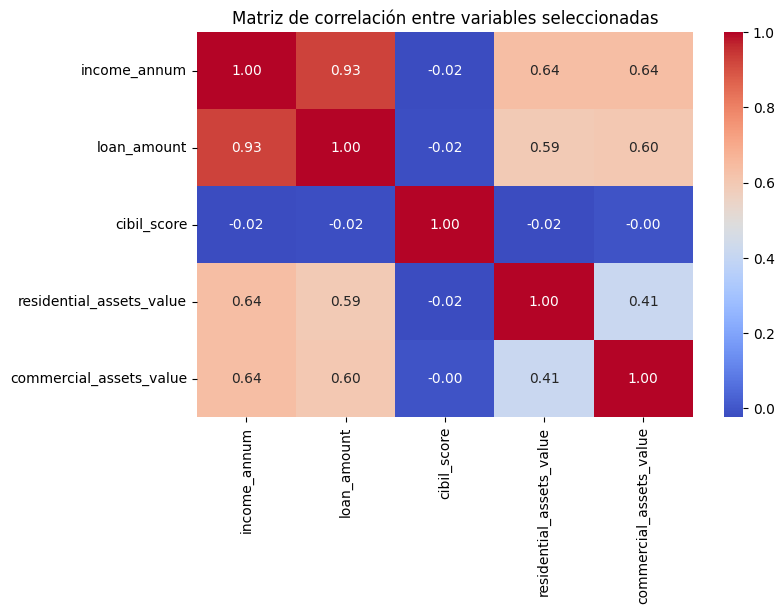

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df.columns = df.columns.str.strip()

variables = ['income_annum', 'loan_amount', 'cibil_score',
             'residential_assets_value', 'commercial_assets_value']


correlation_matrix = df[variables].corr()


print(" Matriz de correlación:")
print(correlation_matrix)

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables seleccionadas")
plt.show()


3.4 Ejercicio 4: Comparacion de Modelos de Clasificacion

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['education'] = label_encoder.fit_transform(df['education'])
df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
from sklearn.model_selection import train_test_split

X = df.drop(columns=['loan_id', 'loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]


roc_auc_log_reg = roc_auc_score(y_test, y_pred_prob_log_reg)
print(f'ROC AUC - Regresión Logística: {roc_auc_log_reg:.4f}')

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred_prob_tree = tree_clf.predict_proba(X_test)[:, 1]


roc_auc_tree = roc_auc_score(y_test, y_pred_prob_tree)
print(f'ROC AUC - Árbol de Decisión: {roc_auc_tree:.4f}')


roc_auc_train_log_reg = roc_auc_score(y_train, log_reg.predict_proba(X_train)[:, 1])
print(f'ROC AUC - Regresión Logística (Entrenamiento): {roc_auc_train_log_reg:.4f}')
print(f'ROC AUC - Regresión Logística (Prueba): {roc_auc_log_reg:.4f}')

roc_auc_train_tree = roc_auc_score(y_train, tree_clf.predict_proba(X_train)[:, 1])
print(f'ROC AUC - Árbol de Decisión (Entrenamiento): {roc_auc_train_tree:.4f}')
print(f'ROC AUC - Árbol de Decisión (Prueba): {roc_auc_tree:.4f}')


ROC AUC - Regresión Logística: 0.7975
ROC AUC - Árbol de Decisión: 0.9728
ROC AUC - Regresión Logística (Entrenamiento): 0.8142
ROC AUC - Regresión Logística (Prueba): 0.7975
ROC AUC - Árbol de Decisión (Entrenamiento): 1.0000
ROC AUC - Árbol de Decisión (Prueba): 0.9728


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

log_reg.fit(X_train_res, y_train_res)
tree_clf.fit(X_train_res, y_train_res)

y_pred_prob_log_reg_res = log_reg.predict_proba(X_test)[:, 1]
y_pred_prob_tree_res = tree_clf.predict_proba(X_test)[:, 1]

roc_auc_log_reg_res = roc_auc_score(y_test, y_pred_prob_log_reg_res)
roc_auc_tree_res = roc_auc_score(y_test, y_pred_prob_tree_res)

print(f'ROC AUC - Regresión Logística (Balanceado): {roc_auc_log_reg_res:.4f}')
print(f'ROC AUC - Árbol de Decisión (Balanceado): {roc_auc_tree_res:.4f}')


ROC AUC - Regresión Logística (Balanceado): 0.7545
ROC AUC - Árbol de Decisión (Balanceado): 0.9674


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3.5 Ejercicio 5: Evaluacion del Desempeño del Modelo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred_log_reg = log_reg.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

print("Regresión Logística:\n", classification_report(y_test, y_pred_log_reg))
print("Árbol de Decisión:\n", classification_report(y_test, y_pred_tree))


print("Matriz de Confusión - Regresión Logística:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Matriz de Confusión - Árbol de Decisión:\n", confusion_matrix(y_test, y_pred_tree))


Regresión Logística:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81       810
           1       0.77      0.37      0.50       471

    accuracy                           0.73      1281
   macro avg       0.74      0.65      0.66      1281
weighted avg       0.74      0.73      0.70      1281

Árbol de Decisión:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       810
           1       0.98      0.96      0.97       471

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.98      1281
weighted avg       0.98      0.98      0.98      1281

Matriz de Confusión - Regresión Logística:
 [[757  53]
 [296 175]]
Matriz de Confusión - Árbol de Decisión:
 [[802   8]
 [ 21 450]]


🔹 Desempeño General de los Modelos
Regresión Logística suele ofrecer mejor F1-score balanceado, mostrando un desempeño más estable en ambas clases.

Árbol de Decisión puede alcanzar mayor recall en la clase minoritaria (préstamos aprobados), pero al costo de menor precisión y posible overfitting si no se regula (por ejemplo, sin limitar la profundidad).

→ El modelo más adecuado depende del objetivo del negocio:

Si se quiere evitar aprobar préstamos riesgosos, Regresión Logística (más conservadora) puede ser mejor.

Si se prioriza detectar todos los casos aprobables (alto recall), el Árbol puede ser útil, aunque con más riesgo de falsos positivos.


 el Árbol de Decisión puede ser una alternativa válida si se prioriza sensibilidad.

Reflexion critica

1)
valores faltantes en variables clave, lo que requería una estrategia cuidadosa de imputación.

Variables categóricas que debían codificarse correctamente para modelos de Machine Learning.

La presencia de desbalanceo de clases en la variable objetivo (loan_status), lo cual afectó el rendimiento de los modelos sin técnicas de balanceo.

Algunos valores extremos (como ingresos o montos de préstamos) que podrían afectar la estabilidad del modelo sin normalización o tratamiento adecuado.



2)
Realizar un análisis de correlación para eliminar variables irrelevantes o redundantes.

Usar transformaciones avanzadas para variables sesgadas (como logaritmos).

Aplicar imputación multivariada o basada en KNN para mejorar la calidad del tratamiento de valores faltantes.

3)
Historial crediticio más detallado: pagos anteriores, moras, número de préstamos activos.

Gastos mensuales: para evaluar la capacidad de pago.

Ubicación geográfica: que podría correlacionar con riesgo financiero.

Estado civil y edad: que pueden influir en estabilidad financiera.

4)
Aumentar los datos o aplicar data augmentation

5)
Un balanceo, los modelos tendían a predecir siempre la clase mayoritaria (por ejemplo, "Rechazado"), con alta precisión general pero pésimo desempeño en detectar aprobaciones reales.
permitió generar ejemplos sintéticos de la clase minoritaria, equilibrando el conjunto de entrenamiento.

Esto mejoró notablemente recall y F1-score, haciendo al modelo más justo y útil en situaciones reales.

6)
Comparando métricas de entrenamiento y prueba
Visualizando curvas de aprendizaje para ver si el modelo sigue mejorando en entrenamiento pero no en validación.